# MLP para classificação

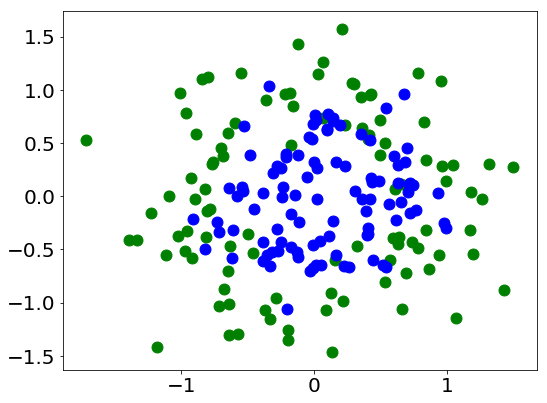

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_networks as neural_network
import common as com

from sklearn import datasets

np.random.seed(12345)

train_ratio = 0.8
validation_ratio = 0.2

#x, y = datasets.load_iris(return_X_y=True)
#x = x[:,2:4]

#np.random.seed(12345)
#x, y = datasets.make_blobs(n_samples=60, centers=3, cluster_std=3)
#x, y = datasets.make_moons(n_samples=200, noise=.2, random_state=12345)
x, y = datasets.make_circles(n_samples=200, noise=0.3, factor=0.5, random_state=12345)

#data_table = pd.read_csv('data/ex2data1.txt', header=None)
#data_table = pd.read_csv('data/ex2data2.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values

#data_table = pd.read_csv('data/blobs2.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values

labels = [0, 1, 2]
colors = ['green', 'blue', 'red']

def plot_data(x, y, marker='o', legend=False, only_data=False):    
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
#plt.savefig('figs/blobs2.png', dpi=com.dpi)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

## Divisão treino/teste e normalização dos dados

Número de padrões de treinamento: 161
Número de padrões de teste: 39


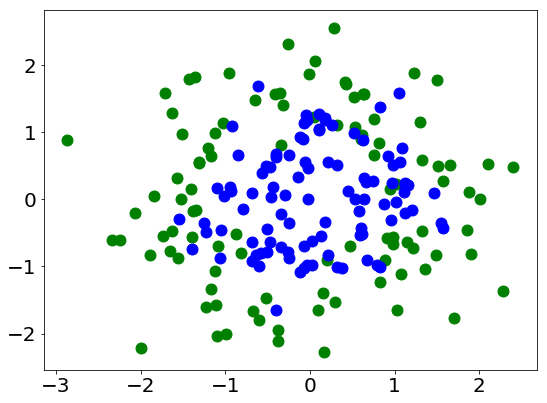

In [90]:
normalize_data = True

np.random.seed(12345)

number_train = int(np.ceil(train_ratio*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(train_index))
print("Número de padrões de teste: %d" % len(test_index))

if normalize_data:

    x_train_mean = np.mean(x_train, axis=0)
    x_train = x_train - x_train_mean
    x_train_std = np.std(x_train, axis=0)
    x_train /= x_train_std

    x_test = (x_test - x_train_mean) / x_train_std

    x = (x - x_train_mean) / x_train_std
    
    fig = plt.figure(figsize=com.figsize)
    plot_data(x, y)
    xlim = fig.gca().get_xlim() 
    ylim = fig.gca().get_ylim() 

## Criação do conjunto de validação

In [91]:
number_validation = int(np.ceil(validation_ratio*(x_train.shape[0])))
number_train_validation = x_train.shape[0] - number_validation

random_index = np.random.permutation(x_train.shape[0])
train_index = random_index[:number_train_validation+1]
validation_index = random_index[number_train_validation+1:number_train_validation+number_validation+1]

x_train_validation, x_validation = x_train[train_index], x_train[validation_index]
y_train_validation, y_validation = y_train[train_index], y_train[validation_index]

print("Conjunto de treinamento: %d amostras" % y_train_validation.shape[0])
print("Conjunto de validação: %d amostras" % y_validation.shape[0])

Conjunto de treinamento: 129 amostras
Conjunto de validação: 32 amostras


## One-hot-encoding

In [92]:
if np.unique(y).shape[0] > 2:
    y_train_encoding = np.zeros((y_train.shape[0], max(y)+1))
    for i in range(y_train_encoding.shape[0]):
        y_train_encoding[i,y_train[i]] = 1
    y_train_validation_encoding = np.zeros((y_train_validation.shape[0], max(y)+1))
    for i in range(y_train_validation_encoding.shape[0]):
        y_train_validation_encoding[i,y_train_validation[i]] = 1
    y_validation_encoding = np.zeros((y_validation.shape[0], max(y)+1))
    for i in range(y_validation_encoding.shape[0]):
        y_validation_encoding[i,y_validation[i]] = 1
    y_test_encoding = np.zeros((y_test.shape[0], max(y)+1))
    for i in range(y_test_encoding.shape[0]):
        y_test_encoding[i,y_test[i]] = 1
    y_encoding = np.zeros((y.shape[0], max(y)+1))
    for i in range(y_encoding.shape[0]):
        y_encoding[i,y_test[i]] = 1
else:
    y_train_encoding = y_train
    y_train_validation_encoding = y_train_validation
    y_validation_encoding = y_validation
    y_test_encoding = y_test
    y_encoding = y

## Solução via MLP

Taxa de erro no treinamento: 9.94%
Taxa de erro no teste: 23.08%


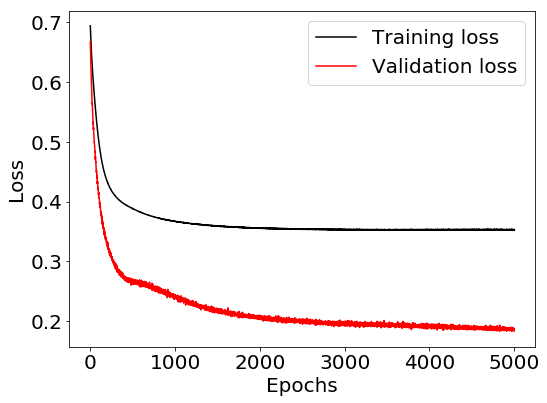

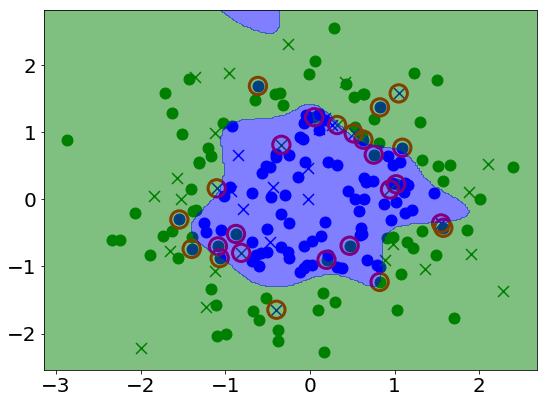

In [94]:
num_hidden_nodes = 20
activation = 'tanh'
output = 'classification'
alpha = 10**-2
mini_batch_size = 10
num_epochs = 5000
momentum = 0.9
weight_decay = 0
model_mlp = neural_network.mlp_train(x=x_train_validation, y=y_train_validation_encoding,
                                     x_validation=x_validation, y_validation=y_validation_encoding,
                                     num_hidden_nodes=num_hidden_nodes, activation=activation, output=output,
                                     num_epochs=num_epochs, alpha=alpha, mini_batch_size=mini_batch_size,
                                     momentum=momentum, weight_decay=weight_decay, compute_loss=True)  

loss_history_mlp = model_mlp['loss_history']
loss_mlp = loss_history_mlp[-1]
validation_loss_history_mlp = model_mlp['validation_loss_history']
valdiation_loss_mlp = validation_loss_history_mlp[-1]

if len(loss_history_mlp) > 1:
    plt.figure(figsize=com.figsize)
    plt.rcParams.update({'font.size': com.fontsize})
    plt.plot(range(1,len(loss_history_mlp)+1), loss_history_mlp, '-k', label='Training loss')
    plt.plot(range(1,len(validation_loss_history_mlp)+1), validation_loss_history_mlp, '-r', label='Validation loss')
    plt.xlabel('Epochs', fontsize=com.fontsize)
    plt.ylabel('Loss', fontsize=com.fontsize)
    plt.legend()

model_mlp = neural_network.mlp_train(x=x_train, y=y_train_encoding,
                                     num_hidden_nodes=num_hidden_nodes, activation=activation, output=output,
                                     num_epochs=num_epochs, alpha=alpha, mini_batch_size=mini_batch_size,
                                     momentum=momentum, weight_decay=weight_decay, compute_loss=False)  
    
wrong_index_train = y_train != neural_network.mlp_predict(model_mlp, x_train, return_class=True)
wrong_index_test = y_test != neural_network.mlp_predict(model_mlp, x_test, return_class=True)    
    
plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)
ax.scatter(x_train[wrong_index_train,0], x_train[wrong_index_train,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, model_mlp,
                  lambda x, model: neural_network.mlp_predict(model, x, return_class=True),
                  xx, yy, colors)
#plt.savefig('iris_binaria_bound2.png', dpi=com.dpi)

print("Taxa de erro no treinamento: %.2f%%" % (100*np.mean(wrong_index_train)))
print("Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test)))

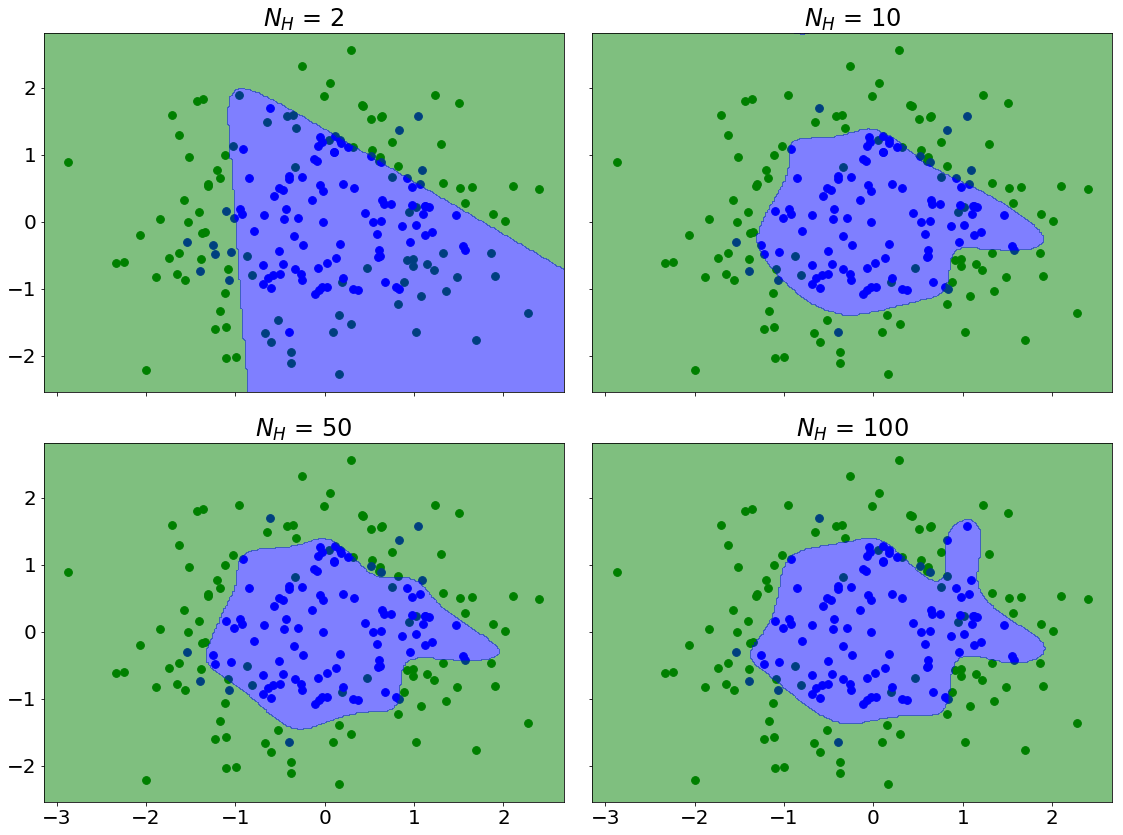

In [97]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))

num_hidden_nodes_list = [2, 10, 50, 100]
for i, num_hidden_nodes in enumerate(num_hidden_nodes_list):
    model_mlp = neural_network.mlp_train(x=x, y=y_encoding,
                                     num_hidden_nodes=num_hidden_nodes, activation=activation, output=output,
                                     num_epochs=5000, alpha=alpha, mini_batch_size=mini_batch_size,
                                     momentum=momentum, weight_decay=0, compute_loss=False)  
   
    axs.flatten()[i].set_xlim(xlim)
    axs.flatten()[i].set_ylim(ylim)
    for j, label in enumerate(labels):
        axs.flatten()[i].scatter(x[y == label,0], x[y == label,1],
                        s=5*com.markersize, marker='o', color=colors[j])  
    xx, yy = com.make_meshgrid(x[:,0], x[:,1])
    com.plot_contours(axs.flatten()[i], model_mlp,
                      lambda x, model: neural_network.mlp_predict(model, x, return_class=True),
                      xx, yy, colors)
    axs.flatten()[i].set_title("$N_H$ = " + str(num_hidden_nodes))
plt.savefig('mlp_neurons', dpi=com.dpi)